In [117]:
import numpy as np
import pandas as pd 

import re

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import seaborn as sns

In [204]:
df = pd.read_csv('/home/enno/uni/SS23/thesis/data/hendecads/stretches_w_groups.csv')
df['stretch_ix'] = df['stretch_ix'].apply(lambda x: list(map(int, x.strip('[]').split(','))))

df

,Unnamed: 0,id,seq,stretch_ix,stretch_seq,avg_cc,group_id
0,0,MCD6041253.1,Mrlvyvavaailcsfsttslagaektakragkfvektatragkfve...,"[1, 71]",rlvyvavaailcsfsttslagaektakragkfvektatragkfver...,0.001041,unassigned
1,1,MCD7737945.1,MQGRVFFREAAALILAAALSMAGLPASAAANSGIEAAALRTeeete...,"[41, 238]",eeetepstkeavqetavetdtgekpesgedgqeesaesteeeqeed...,0.000364,unassigned
2,2,MYF28459.1,Merlqtdllkeihalrgemhaefasvrqemhagfasirqemhaeta...,"[1, 73]",erlqtdllkeihalrgemhaefasvrqemhagfasirqemhaetas...,0.001002,unassigned
3,3,WP_168920948.1,MSDVFLTASYADREKVKTLGARWNPAEKRWYVPSGRDLSPFAAWLP...,"[437, 540]",aqslvveikhaasqqlllarhvvparmaevtaegrqalrtakaqsq...,0.000689,group_42
4,4,WP_026306873.1,MLLRRIARPLLSAAFIAEGIDILQNPGPLADRLSPALDFTRRRSQH...,"[172, 342]",slgwrgrraardakdhaealaataaaiaatarergtnlvdtarert...,0.000424,group_38
...,...,...,...,...,...,...,...
40585,40585,XP_034013580.1,MKLNWLLGILPIVAANFDDWSKADLTQFLEDRNVTVQKGDDLVQLA...,"[667, 798]",kdakksgesfaslasksgawyadafysvasesgesaasqalqtgqk...,0.000553,group_106
40586,40586,GFR06050.1,MSDVYMDDLLTGADDLESGRKLQEQLVSLLRGAGMELHKWSASNPL...,"[578, 680]",eqrsiseeyekirdyfkdlkiklrekftrfgqwvkgkyergleksk...,0.000696,group_9
40587,40587,KAG2190414.1,MSSSILRASIRRNATIANKRFYSAPPPPPYAPNNQGGGNGGLFLGL...,"[65, 170]",gtltkqgevvdqkiqegkqavrdkadeakakyeqskseagqavdqk...,0.000676,unassigned
40588,40588,MBY0528383.1,MRVYCSLLASLLTCATIASQPPPLVFNGGTNSLAPRRILAAEKQET...,"[734, 833]",isaltndknrmvrknavdslgffpwdakaivpllvallsdkdsdla...,0.000714,group_1_1


In [196]:
aa_dict = {'r': '+',
           'h': '+',
           'k': '+',
           'd': '-',
           'e': '-',
           's': 'polar',
           't': 'polar',
           'n': 'polar',
           'q': 'polar',
           'c': 'special',
           'u': 'special',
           'g': 'special',
           'p': 'special',
           'a': 'hydrophobic',
           'v': 'hydrophobic',
           'i': 'hydrophobic',
           'l': 'hydrophobic',
           'm': 'hydrophobic',
           'f': 'hydrophobic',
           'y': 'hydrophobic',
           'w': 'hydrophobic'}

color_dict = {'+': '#00A012',           # green  
              '-': '#D81B60',           # red
              'polar': '#FFC107',       # yellow
              'hydrophobic': '#1E88E5', # blue    
              'special': '#ADADAD'}     # grey

In [ ]:
# Letter code and color code for expected hendecad repeat
repeat = ['A', 'b', 'c', 'D', 'E', 'f', 'g', 'H', 'i', 'j', 'k']
color_repeat = [color_dict['hydrophobic'], color_dict['special'], color_dict['special'], color_dict['hydrophobic'], color_dict['hydrophobic'], color_dict['special'], color_dict['special'], color_dict['hydrophobic'], color_dict['special'], color_dict['special'], color_dict['special']]

In [200]:
def plot_seq_pc(seq, n_shift=0):
    # @param shif: allows you to shift the sequence to the right by a certain amount cutting of the first n amino acids
    seq = seq[n_shift:]

    # Apply expected hendecad repeat to whole sequence
    positions = [repeat[i%11] for i in range(len(seq))]
    colors = [color_dict[aa_dict[aa]] for aa in seq]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 2))

    ax1.bar(np.arange(len(seq)), np.ones(len(seq)), color=colors)
    ax1.set_yticks([])
    ax1.set_xticks(np.arange(len(seq)))
    ax1.set_xticklabels(positions)

    expected_colors = [color_repeat[i%11] for i in range(len(seq))]

    ax2.bar(np.arange(len(seq)), np.ones(len(seq)), color=expected_colors)
    ax2.set_yticks([])
    ax2.set_xticks([])

    for i in range(0, len(seq), 11):
        ax1.axvline(i-0.5, color='black', linestyle='--')
        ax2.axvline(i-0.5, color='black', linestyle='--')

    # Add legend
    legend_elements = [Patch(facecolor=color_dict[aa], edgecolor='black', label=aa) for aa in color_dict.keys()]
    plt.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.2, 1.1))
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()


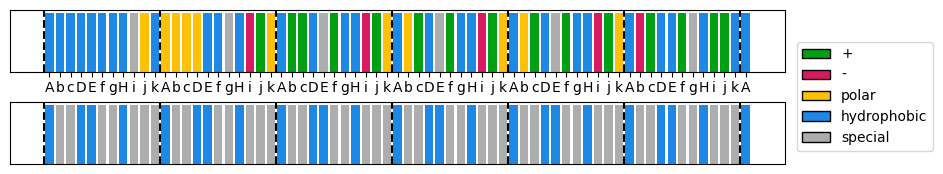

In [201]:
plot_seq_pc(df['stretch_seq'].iloc[0], n_shift=3)